In [1]:
import yfinance as yf
symbole_msft = yf.Ticker("MSFT")
df_historique_msft = symbole_msft.history(period="max") # Chercher l'historique des prix de l'action
df_historique_msft.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1986-03-13,0.055898,0.064119,0.055898,0.061378,1031788800,0.0,0.0
1986-03-14,0.061378,0.064667,0.061378,0.063570,308160000,0.0,0.0
1986-03-17,0.063570,0.065215,0.063570,0.064667,133171200,0.0,0.0
1986-03-18,0.064667,0.065215,0.062474,0.063022,67766400,0.0,0.0
1986-03-19,0.063022,0.063570,0.061378,0.061926,47894400,0.0,0.0


<AxesSubplot:xlabel='Date'>

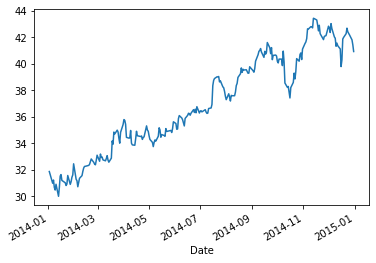

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
df_historique_msft_2014_close = df_historique_msft['2014-01-01': '2015-01-01']['Close']
df_historique_msft_2014_close.plot()

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

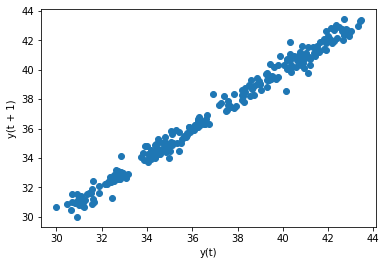

In [3]:
from pandas.plotting import lag_plot
plt.figure()
# Affiche Yt+lag vs Yt
# Si lag=1 affiche serie[:-1] vs. serie[1:]
lag_plot(df_historique_msft_2014_close,lag=1)

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 5)'>

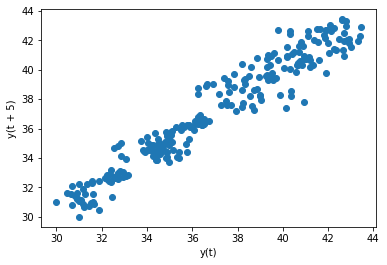

In [4]:
lag_plot(df_historique_msft_2014_close, lag=5)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

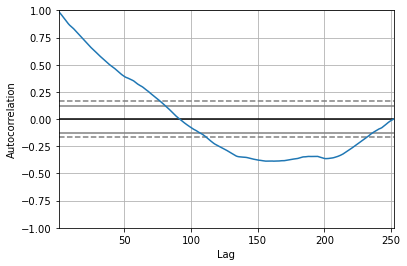

In [5]:
from pandas.plotting import autocorrelation_plot
plt.figure()
# La ligne pleine indique l'intervalle de confiance à 95%
# La ligne pointillée indique l'intervalle de confiance à 99%
autocorrelation_plot(df_historique_msft_2014_close)

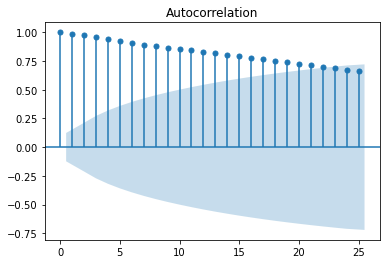

In [6]:
# plot_acf() de statsmodel produit un graphique similaire
# le cône est un intervalle de confiance à 95%
from statsmodels.graphics.tsaplots import plot_acf
# Plot the acf function on the ts_data_load set
plot_acf(df_historique_msft_2014_close)
plt.show()

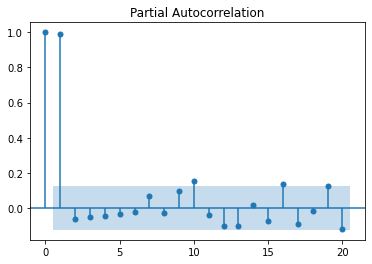

In [7]:
from statsmodels.graphics.tsaplots import plot_pacf
# Autocorrélation partielle : corrélation après avoir enlevé l'effet des données plus récentes par rapport à cible
plot_pacf(df_historique_msft_2014_close, lags=20)
plt.show()

Modèle AR(1) : AIC =  -1.629876120103837
                            AutoReg Model Results                             
Dep. Variable:                  Close   No. Observations:                  252
Model:                     AutoReg(1)   Log Likelihood                -148.604
Method:               Conditional MLE   S.D. of innovations              0.437
Date:                Mon, 17 Jan 2022   AIC                             -1.630
Time:                        07:58:50   BIC                             -1.588
Sample:                             1   HQIC                            -1.613
                                  252                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.3561      0.280      1.273      0.203      -0.192       0.904
Close.L1       0.9913      0.008    131.550      0.000       0.977       1.006
           

C:\Users\vango\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\vango\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(
C:\Users\vango\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
C:\Users\vango\anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:147: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Int64Indexes with a unit incr

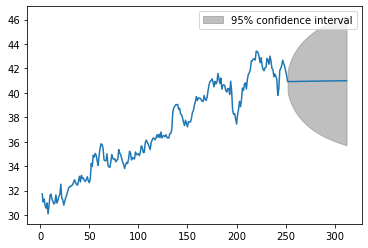

In [8]:
from statsmodels.tsa.ar_model import AutoReg
modele_ar1 = AutoReg(df_historique_msft_2014_close,lags=1)
modele_fit = modele_ar1.fit()
print('Modèle AR(1) : AIC = ', modele_fit.aic)
print(modele_fit.summary())
modele_fit.plot_predict(start=2, end=len(df_historique_msft_2014_close)+60)
plt.show()

Modèle AR(1) : AIC =  -1.6605123346463015
                            AutoReg Model Results                             
Dep. Variable:                  Close   No. Observations:                  252
Model:             Restr. AutoReg(10)   Log Likelihood                -138.461
Method:               Conditional MLE   S.D. of innovations              0.429
Date:                Mon, 17 Jan 2022   AIC                             -1.661
Time:                        08:01:24   BIC                             -1.603
Sample:                            10   HQIC                            -1.637
                                  252                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.3958      0.292      1.357      0.175      -0.176       0.967
Close.L1       0.9592      0.024     39.473      0.000       0.912       1.007
Close.L10 

C:\Users\vango\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\vango\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(
C:\Users\vango\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
C:\Users\vango\anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:147: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Int64Indexes with a unit incr

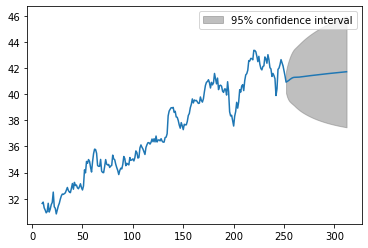

In [10]:
from statsmodels.tsa.ar_model import AutoReg
modele_ar1 = AutoReg(df_historique_msft_2014_close,lags=[1,10])
modele_fit = modele_ar1.fit()
print('Modèle AR(1) : AIC = ', modele_fit.aic)
print(modele_fit.summary())
modele_fit.plot_predict(start=2, end=len(df_historique_msft_2014_close)+60)
plt.show()

In [9]:
from statsmodels.tsa.ar_model import ar_select_order
modeles = ar_select_order(df_historique_msft_2014_close,maxlag=20)
print("Décalages choisis:", modeles.ar_lags)

Décalages choisis: [1]


C:\Users\vango\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\vango\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(
C:\Users\vango\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\vango\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to

Modèle AR(1) : AIC =  -1.6348659893994246
                            AutoReg Model Results                             
Dep. Variable:                  Close   No. Observations:                  252
Model:                    AutoReg(20)   Log Likelihood                -117.549
Method:               Conditional MLE   S.D. of innovations              0.402
Date:                Sun, 16 Jan 2022   AIC                             -1.635
Time:                        15:20:27   BIC                             -1.308
Sample:                            20   HQIC                            -1.503
                                  252                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.4378      0.294      1.490      0.136      -0.138       1.014
Close.L1       1.0847      0.065     16.811      0.000       0.958       1.211
Close.L2  

C:\Users\vango\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\vango\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(
C:\Users\vango\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
C:\Users\vango\anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:147: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Int64Indexes with a unit incr

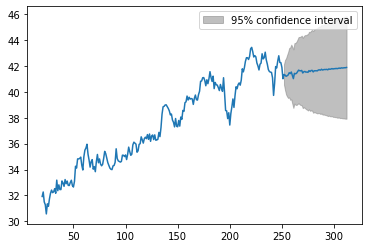

In [10]:
from statsmodels.tsa.ar_model import AutoReg
modele_ar1 = AutoReg(df_historique_msft_2014_close,lags=20)
modele_fit = modele_ar1.fit()
print('Modèle AR(1) : AIC = ', modele_fit.aic)
print(modele_fit.summary())
modele_fit.plot_predict(start=2, end=len(df_historique_msft_2014_close)+60)
plt.show()

Modèle AR(1) : AIC =  -1.6599259553107424
                            AutoReg Model Results                             
Dep. Variable:                  Close   No. Observations:                  252
Model:             Restr. AutoReg(20)   Log Likelihood                -129.642
Method:               Conditional MLE   S.D. of innovations              0.423
Date:                Sun, 16 Jan 2022   AIC                             -1.660
Time:                        15:23:52   BIC                             -1.556
Sample:                            20   HQIC                            -1.618
                                  252                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.4685      0.309      1.515      0.130      -0.138       1.075
Close.L1       0.9571      0.025     38.424      0.000       0.908       1.006
Close.L10 

C:\Users\vango\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\vango\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(
C:\Users\vango\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
C:\Users\vango\anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:147: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Int64Indexes with a unit incr

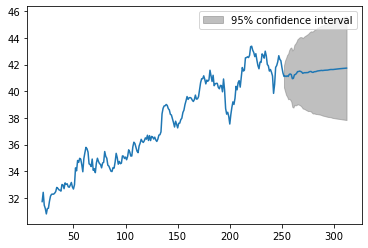

In [11]:
from statsmodels.tsa.ar_model import AutoReg
modele_ar1 = AutoReg(df_historique_msft_2014_close,lags=[1,10,16,19,20])
modele_fit = modele_ar1.fit()
print('Modèle AR(1) : AIC = ', modele_fit.aic)
print(modele_fit.summary())
modele_fit.plot_predict(start=2, end=len(df_historique_msft_2014_close)+60)
plt.show()

Modèle AR(1) : AIC =  -1.66051853726613
                            AutoReg Model Results                             
Dep. Variable:                  Close   No. Observations:                  252
Model:             Restr. AutoReg(10)   Log Likelihood                -138.460
Method:               Conditional MLE   S.D. of innovations              0.429
Date:                Sun, 16 Jan 2022   AIC                             -1.661
Time:                        15:26:02   BIC                             -1.603
Sample:                            10   HQIC                            -1.637
                                  252                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.3958      0.292      1.357      0.175      -0.176       0.967
Close.L1       0.9592      0.024     39.473      0.000       0.912       1.007
Close.L10   

C:\Users\vango\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\vango\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(
C:\Users\vango\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
C:\Users\vango\anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:147: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Int64Indexes with a unit incr

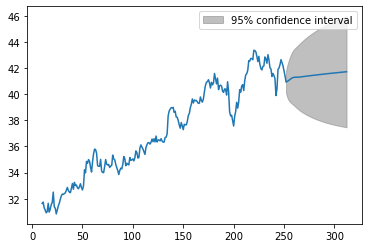

ARIMA(1, 0, 0) : AIC=1477.43277124094
                              ARMA Model Results                              
Dep. Variable:                  Close   No. Observations:                  756
Model:                     ARMA(1, 0)   Log Likelihood                -735.716
Method:                       css-mle   S.D. of innovations              0.638
Date:                Sun, 16 Jan 2022   AIC                           1477.433
Time:                        14:21:56   BIC                           1491.317
Sample:                             0   HQIC                          1482.781
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          44.0619      7.192      6.127      0.000      29.966      58.157
ar.L1.Close     0.9978      0.002    440.011      0.000       0.993       1.002
          

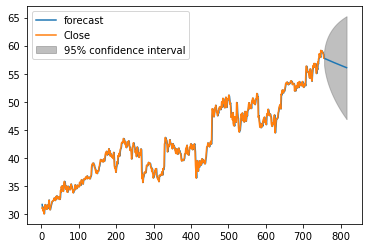

In [8]:
import numpy as np
import pandas as pd
import itertools
from statsmodels.tsa.arima_model import ARIMA, ARMA
import warnings
warnings.filterwarnings("ignore")

modele_ar1 = ARIMA(df_historique_msft_2014_close,order=(1,0,0))
modele_fit = modele_ar1.fit()
print('ARIMA{} : AIC={}'.format((1,0,0), modele_fit.aic))
print(modele_fit.summary())
modele_fit.plot_predict(start=2, end=len(df_historique_msft_2014_close)+60)
plt.show()

ARIMA(0, 0, 1): AIC=4124.161626773115
                              ARMA Model Results                              
Dep. Variable:                  Close   No. Observations:                  756
Model:                     ARMA(0, 1)   Log Likelihood               -2059.081
Method:                       css-mle   S.D. of innovations              3.681
Date:                Sun, 16 Jan 2022   AIC                           4124.162
Time:                        14:21:58   BIC                           4138.046
Sample:                             0   HQIC                          4129.509
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          43.1432      0.260    165.989      0.000      42.634      43.653
ma.L1.Close     0.9425      0.009    101.175      0.000       0.924       0.961
          

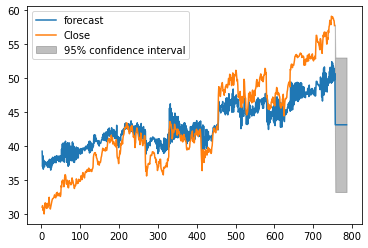

In [9]:
modele_ma1 = ARIMA(df_historique_msft_2014_close,order=(0,0,1))
modele_fit = modele_ma1.fit(disp=0)
print('ARIMA{}: AIC={}'.format((0,0,1), modele_fit.aic))
print(modele_fit.summary())
modele_fit.plot_predict(start=2, end=len(df_historique_msft_2014_close)+30)
plt.show()

ARIMA(0, 1, 0) - AIC:1466.2889950306103
                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                  755
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -731.144
Method:                           css   S.D. of innovations              0.637
Date:                Sun, 16 Jan 2022   AIC                           1466.289
Time:                        14:22:01   BIC                           1475.542
Sample:                             1   HQIC                          1469.853
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0343      0.023      1.480      0.139      -0.011       0.080


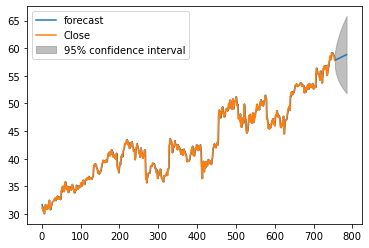

In [10]:
modele_d1 = ARIMA(df_historique_msft_2014_close,order=(0,1,0))
modele_fit = modele_d1.fit(disp=0)
print('ARIMA{} - AIC:{}'.format((0,1,0), modele_fit.aic))
print(modele_fit.summary())
modele_fit.plot_predict(start=2, end=len(df_historique_msft_2014_close)+30)
plt.show()

ARIMA(0, 0, 0) - AIC:5071.005911609863
ARIMA(0, 0, 1) - AIC:4124.161626773115
ARIMA(0, 1, 0) - AIC:1466.2889950306103
ARIMA(0, 1, 1) - AIC:1468.2636889185842
ARIMA(0, 1, 2) - AIC:1470.2116501102287
ARIMA(0, 1, 3) - AIC:1471.4280436065933
ARIMA(0, 1, 4) - AIC:1472.7021845364147
ARIMA(0, 2, 0) - AIC:1982.888242730289
ARIMA(0, 2, 1) - AIC:1473.8676677131125
ARIMA(0, 2, 2) - AIC:1475.8313055624574
ARIMA(0, 2, 3) - AIC:1477.7942265078595
ARIMA(0, 2, 4) - AIC:1479.0804311279958
ARIMA(1, 0, 0) - AIC:1477.43277124094
ARIMA(1, 0, 1) - AIC:1479.3497990577666
ARIMA(1, 0, 2) - AIC:1481.343024636742
ARIMA(1, 0, 3) - AIC:1482.8318934996244
ARIMA(1, 0, 4) - AIC:1484.39070576547
ARIMA(1, 1, 0) - AIC:1468.2641063598535
ARIMA(1, 1, 1) - AIC:1462.071408218134
ARIMA(1, 1, 2) - AIC:1463.773740290233
ARIMA(1, 1, 3) - AIC:1470.0889458589759
ARIMA(1, 1, 4) - AIC:1471.8363575969083
ARIMA(1, 2, 0) - AIC:1775.161829749276
ARIMA(1, 2, 1) - AIC:1475.8317872820342
ARIMA(1, 2, 2) - AIC:1477.2594001775692
ARIMA(1, 2,

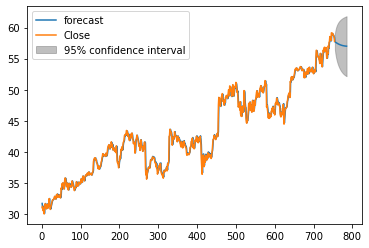

In [11]:
warnings.filterwarnings("ignore")
meilleur_aic= np.inf
meilleurs_parametres = (0,0,0)
for p in range(0,5):
    for d in range(0,3):
        for q in range(0,5):
            try:
                modele_arima = ARIMA(df_historique_msft_2014_close,order=(p,d,q))
                modele_fit = modele_arima.fit()
                if modele_fit.aic < meilleur_aic:
                    meilleur_aic = modele_fit.aic
                    meilleurs_parametres = (p,d,q)
                print('ARIMA{} - AIC:{}'.format((p,d,q), modele_fit.aic))
            except:
                continue     

print('Meilleur modèle est ARIMA{}: AIC={}'.format(meilleurs_parametres, meilleur_aic))
meilleur_modele = ARIMA(df_historique_msft_2014_close, order=meilleurs_parametres)
modele_fit = meilleur_modele.fit(disp=0) 
print(modele_fit.summary())

modele_fit.plot_predict(start=2, end=len(df_historique_msft_2014_close)+30)
plt.show()

ARIMA(1, 0, 0) : AIC=-0.8765925535805802
                            AutoReg Model Results                             
Dep. Variable:                  Close   No. Observations:                  756
Model:                    AutoReg(10)   Log Likelihood                -719.559
Method:               Conditional MLE   S.D. of innovations              0.635
Date:                Sun, 16 Jan 2022   AIC                             -0.877
Time:                        14:23:16   BIC                             -0.802
Sample:                            10   HQIC                            -0.848
                                  756                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1351      0.151      0.892      0.372      -0.162       0.432
Close.L1       0.9997      0.037     27.311      0.000       0.928       1.071
Close.L2   

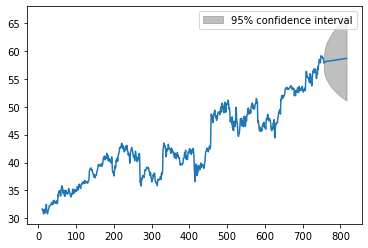

In [12]:
from statsmodels.tsa.ar_model import AutoReg
modele_ar1 = AutoReg(df_historique_msft_2014_close,lags=10)
modele_fit = modele_ar1.fit()
print('ARIMA{} : AIC={}'.format((1,0,0), modele_fit.aic))
print(modele_fit.summary())
modele_fit.plot_predict(start=2, end=len(df_historique_msft_2014_close)+60)
plt.show()

Modèle AR(1) : AIC =  -0.8942198655628764
                            AutoReg Model Results                             
Dep. Variable:                  Close   No. Observations:                  756
Model:                     AutoReg(1)   Log Likelihood                -730.731
Method:               Conditional MLE   S.D. of innovations              0.637
Date:                Sun, 16 Jan 2022   AIC                             -0.894
Time:                        14:23:35   BIC                             -0.876
Sample:                             1   HQIC                            -0.887
                                  756                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1664      0.147      1.132      0.258      -0.122       0.454
Close.L1       0.9969      0.003    296.281      0.000       0.990       1.004
          

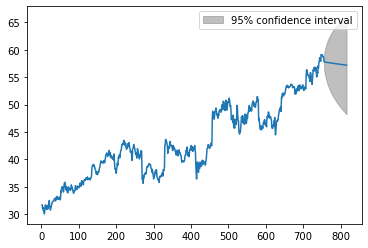

In [13]:
from statsmodels.tsa.ar_model import AutoReg
modele_ar1 = AutoReg(df_historique_msft_2014_close,lags=1)
modele_fit = modele_ar1.fit()
print('Modèle AR(1) : AIC = ', modele_fit.aic)
print(modele_fit.summary())
modele_fit.plot_predict(start=2, end=len(df_historique_msft_2014_close)+60)
plt.show()